### Определение собственных чисел краевой задачи Штурма-Лиувилля

Рассмотрим краевую задачу:


$\psi^{\prime\prime}(x)+x^2\psi =-\lambda\psi, \quad x \in (0, 1)$

$\psi^{\prime}(0)=0,\quad \psi(1)^{\prime}=0$.


Решение задачи в первом приближении разыскивается в виде следующего ряда:

$\psi(x)=C_0+C_1 x+C_{2} x^2+\dots +C_n x^n=\sum\limits_{i}^{n}C_{i}x^{i}=0$.

Составим дополнительнве граничные условия, дифференцируя  уравнение.  

Пусть $x=0$. тогда

$\psi(0)=1$

$\psi'(0)=0$

$\psi^{\prime\prime}(0)= -\lambda,$

$\psi^{\prime\prime\prime}(0)= 0,$

$\psi^{4}(0)= \lambda^2 - 1,$

$\psi^{5}(0)= 0,$

$\psi^{n}(0)= -a_n\psi^{(n-4)} - \lambda\psi^{(n-2)}(0),  \quad n \geq 0$

Пусть $x=1$. тогда

$\psi'(1)=0$


$a_n = a_{(n-1)} + 2(n-3)$

$a_{(0,1,2,3)} = 0$

$\boldsymbol{\psi^{(n)}(x)=-a_{n}\psi^{(n-4)}- (2(n-2)x \psi^{(n-3)}(x) - (\lambda + x^2)\psi^{(n-2)}(x)), \quad n \geq 4}$


In [102]:
#from scipy import integrate # только определнные интегралы
import math
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

import sympy as sp
from scipy import linalg

In [103]:
N=15   #  степень многочлена  (четная)

from sympy import symbols 
C=symbols('C:16')  #   постоянных до N+1


f = sp.Function("f") 
x = sp.Symbol("x")  # переменая x
lmb = sp.Symbol("lmb")  # переменая x

Определение функции 

$\psi(x)=C_0+C_1 x+C_{2} x^2+\dots +C_n x^n$.

Постоянные $C_i$ и переменная $x$ введены как тип Symbol


In [104]:
def f(x):
    var=0
    for k in range(0,N+1):
        var+=(1.)*C[k]*x**(k)   #/math.factorial(k)
    return var
    

In [105]:
f(x)

1.0*C0 + 1.0*C1*x + 1.0*C10*x**10 + 1.0*C11*x**11 + 1.0*C12*x**12 + 1.0*C13*x**13 + 1.0*C14*x**14 + 1.0*C15*x**15 + 1.0*C2*x**2 + 1.0*C3*x**3 + 1.0*C4*x**4 + 1.0*C5*x**5 + 1.0*C6*x**6 + 1.0*C7*x**7 + 1.0*C8*x**8 + 1.0*C9*x**9

In [106]:
f(x).evalf(subs={C[1]:0})

1.0*C0 + 1.0*C10*x**10 + 1.0*C11*x**11 + 1.0*C12*x**12 + 1.0*C13*x**13 + 1.0*C14*x**14 + 1.0*C15*x**15 + 1.0*C2*x**2 + 1.0*C3*x**3 + 1.0*C4*x**4 + 1.0*C5*x**5 + 1.0*C6*x**6 + 1.0*C7*x**7 + 1.0*C8*x**8 + 1.0*C9*x**9

Краевые условия записываются в массив переменной длины s.
Правая часть - массив b

In [107]:
s=[]
# Неоднородное Краевое условие 
s.append(f(x).evalf(subs={x:0}))

#  Считаем  производные в точке 1 
for k in range(2): #(int(N/2)-6):    
    df=lambda x : sp.diff(f(x),x,2*k)
    print(df(x))
    s.append(df(x).evalf(subs={x: 1}))

#  Считаем условия с lambda
for k in range(1,15):    
    df=lambda x : sp.diff(f(x),x,k)
    print(df(x))
    s.append(df(x).evalf(subs={x: 0}))


# Правые части
#b=[1, 1, 0, 0, -lmb, 0, lmb**2-1, 0, -lmb**3+13*lmb, 0, lmb**4-43*lmb**2+30, 0, -lmb**5+99*lmb**3-758*lmb, 0, lmb**6-189*lmb**4+4628*lmb**2-2700, 0, -lmb**7+321*lmb**5-18446*lmb**3+103056*lmb]

1.0*C0 + 1.0*C1*x + 1.0*C10*x**10 + 1.0*C11*x**11 + 1.0*C12*x**12 + 1.0*C13*x**13 + 1.0*C14*x**14 + 1.0*C15*x**15 + 1.0*C2*x**2 + 1.0*C3*x**3 + 1.0*C4*x**4 + 1.0*C5*x**5 + 1.0*C6*x**6 + 1.0*C7*x**7 + 1.0*C8*x**8 + 1.0*C9*x**9
90.0*C10*x**8 + 110.0*C11*x**9 + 132.0*C12*x**10 + 156.0*C13*x**11 + 182.0*C14*x**12 + 210.0*C15*x**13 + 2.0*C2 + 6.0*C3*x + 12.0*C4*x**2 + 20.0*C5*x**3 + 30.0*C6*x**4 + 42.0*C7*x**5 + 56.0*C8*x**6 + 72.0*C9*x**7
1.0*C1 + 10.0*C10*x**9 + 11.0*C11*x**10 + 12.0*C12*x**11 + 13.0*C13*x**12 + 14.0*C14*x**13 + 15.0*C15*x**14 + 2.0*C2*x + 3.0*C3*x**2 + 4.0*C4*x**3 + 5.0*C5*x**4 + 6.0*C6*x**5 + 7.0*C7*x**6 + 8.0*C8*x**7 + 9.0*C9*x**8
90.0*C10*x**8 + 110.0*C11*x**9 + 132.0*C12*x**10 + 156.0*C13*x**11 + 182.0*C14*x**12 + 210.0*C15*x**13 + 2.0*C2 + 6.0*C3*x + 12.0*C4*x**2 + 20.0*C5*x**3 + 30.0*C6*x**4 + 42.0*C7*x**5 + 56.0*C8*x**6 + 72.0*C9*x**7
720.0*C10*x**7 + 990.0*C11*x**8 + 1320.0*C12*x**9 + 1716.0*C13*x**10 + 2184.0*C14*x**11 + 2730.0*C15*x**12 + 6.0*C3 + 24.0*C4*x + 6

In [108]:
b=[]
a=[]

a.append(0)
a.append(0)
a.append(0)
a.append(0)

b.append(1)
b.append(1)
b.append(0)
b.append(0)

for i in range(4,N+1):
    a.append(a[i-1]+2*(i-3))
for k in range(4,N+1):
    b.append(sp.simplify((-1)*a[k]*b[k-4]-lmb*b[k-2]))


In [109]:
b

[1,
 1,
 0,
 0,
 -2,
 -6,
 2*lmb,
 6*lmb,
 60 - 2*lmb**2,
 252 - 6*lmb**2,
 2*lmb*(lmb**2 - 86),
 6*lmb*(lmb**2 - 114),
 -2*lmb**4 + 352*lmb**2 - 5400,
 -6*lmb**4 + 1344*lmb**2 - 27720,
 2*lmb*(lmb**4 - 308*lmb**2 + 14052),
 6*lmb*(lmb**4 - 380*lmb**2 + 22404)]

In [110]:
s# смотрим s

[1.0*C0,
 1.0*C0 + 1.0*C1 + 1.0*C10 + 1.0*C11 + 1.0*C12 + 1.0*C13 + 1.0*C14 + 1.0*C15 + 1.0*C2 + 1.0*C3 + 1.0*C4 + 1.0*C5 + 1.0*C6 + 1.0*C7 + 1.0*C8 + 1.0*C9,
 90.0*C10 + 110.0*C11 + 132.0*C12 + 156.0*C13 + 182.0*C14 + 210.0*C15 + 2.0*C2 + 6.0*C3 + 12.0*C4 + 20.0*C5 + 30.0*C6 + 42.0*C7 + 56.0*C8 + 72.0*C9,
 1.0*C1,
 2.0*C2,
 6.0*C3,
 24.0*C4,
 120.0*C5,
 720.0*C6,
 5040.0*C7,
 40320.0*C8,
 362880.0*C9,
 3628800.0*C10,
 39916800.0*C11,
 479001600.0*C12,
 6227020800.0*C13,
 87178291200.0*C14]

Составляем систему  уравнений для нахождения постоянных $C_{i}$, записав их в переменную equations
и решаем с помощью solve. Ответ запиываем в переменную res. 

Результатом решения системы уравнений будет словарь, где ключами будут $C_{i}$, а значениями - решения. 

In [111]:
equations = [sp.Eq(s[k],b[k]) for k in range(len(b))]

In [112]:
equations# смотрим уравнения

[Eq(1.0*C0, 1),
 Eq(1.0*C0 + 1.0*C1 + 1.0*C10 + 1.0*C11 + 1.0*C12 + 1.0*C13 + 1.0*C14 + 1.0*C15 + 1.0*C2 + 1.0*C3 + 1.0*C4 + 1.0*C5 + 1.0*C6 + 1.0*C7 + 1.0*C8 + 1.0*C9, 1),
 Eq(90.0*C10 + 110.0*C11 + 132.0*C12 + 156.0*C13 + 182.0*C14 + 210.0*C15 + 2.0*C2 + 6.0*C3 + 12.0*C4 + 20.0*C5 + 30.0*C6 + 42.0*C7 + 56.0*C8 + 72.0*C9, 0),
 Eq(1.0*C1, 0),
 Eq(2.0*C2, -2),
 Eq(6.0*C3, -6),
 Eq(24.0*C4, 2*lmb),
 Eq(120.0*C5, 6*lmb),
 Eq(720.0*C6, 60 - 2*lmb**2),
 Eq(5040.0*C7, 252 - 6*lmb**2),
 Eq(40320.0*C8, 2*lmb*(lmb**2 - 86)),
 Eq(362880.0*C9, 6*lmb*(lmb**2 - 114)),
 Eq(3628800.0*C10, -2*lmb**4 + 352*lmb**2 - 5400),
 Eq(39916800.0*C11, -6*lmb**4 + 1344*lmb**2 - 27720),
 Eq(479001600.0*C12, 2*lmb*(lmb**4 - 308*lmb**2 + 14052)),
 Eq(6227020800.0*C13, 6*lmb*(lmb**4 - 380*lmb**2 + 22404))]

In [113]:
res=sp.solve(equations,C)   # функция solve решает систему уравнений, назожит пвектор C

In [114]:
res #  получили словарь  res[C[1]]  # элемент словаря

{C0: 1.00000000000000,
 C1: 0.0,
 C10: -5.51146384479718e-7*lmb**4 + 9.70017636684303e-5*lmb**2 - 0.00148809523809524,
 C11: -1.5031265031265e-7*lmb**4 + 3.36700336700337e-5*lmb**2 - 0.000694444444444444,
 C12: 4.17535139757362e-9*lmb**5 - 1.28600823045267e-6*lmb**3 + 5.86720378387045e-5*lmb,
 C13: 9.63542630209297e-10*lmb**5 - 3.66146199479533e-7*lmb**3 + 2.15872090872091e-5*lmb,
 C14: -1.34895968229302e-8*lmb**5 + 2.89888682745826e-6*lmb**4 - 0.000350019799424561*lmb**3 + 0.0244640280354566*lmb**2 - 0.89602423700638*lmb + 13.887429138322,
 C15: 8.35070279514724e-9*lmb**5 - 2.19742779266589e-6*lmb**4 + 0.000285534387716927*lmb**3 - 0.0206264458645411*lmb**2 + 0.768761438076914*lmb - 12.0185799319728,
 C2: -1.00000000000000,
 C3: -1.00000000000000,
 C4: 0.0833333333333333*lmb,
 C5: 0.05*lmb,
 C6: 0.0833333333333333 - 0.00277777777777778*lmb**2,
 C7: 0.05 - 0.00119047619047619*lmb**2,
 C8: 4.96031746031746e-5*lmb**3 - 0.00426587301587302*lmb,
 C9: 1.65343915343915e-5*lmb**3 - 0.00188492

Составляем функцию 

$\psi(\lambda,x)=C_{0}(\lambda)+C_{1}(\lambda)x^2+C_{3}(\lambda)x^3+\dots$

In [115]:
psi=lambda x: f(x).evalf(subs={C[k]: res[C[k]] for k in range(N+1)})   

In [116]:
psi(x) # смотрим функцию psi

0.05*lmb*x**5 + 0.0833333333333333*lmb*x**4 + 1.0*x**15*(8.35070279514724e-9*lmb**5 - 2.19742779266589e-6*lmb**4 + 0.000285534387716927*lmb**3 - 0.0206264458645411*lmb**2 + 0.768761438076914*lmb - 12.0185799319728) + 1.0*x**14*(-1.34895968229302e-8*lmb**5 + 2.89888682745826e-6*lmb**4 - 0.000350019799424561*lmb**3 + 0.0244640280354566*lmb**2 - 0.89602423700638*lmb + 13.887429138322) + 1.0*x**13*(9.63542630209297e-10*lmb**5 - 3.66146199479533e-7*lmb**3 + 2.15872090872091e-5*lmb) + 1.0*x**12*(4.17535139757362e-9*lmb**5 - 1.28600823045267e-6*lmb**3 + 5.86720378387045e-5*lmb) + 1.0*x**11*(-1.5031265031265e-7*lmb**4 + 3.36700336700337e-5*lmb**2 - 0.000694444444444444) + 1.0*x**10*(-5.51146384479718e-7*lmb**4 + 9.70017636684303e-5*lmb**2 - 0.00148809523809524) + 1.0*x**9*(1.65343915343915e-5*lmb**3 - 0.00188492063492063*lmb) + 1.0*x**8*(4.96031746031746e-5*lmb**3 - 0.00426587301587302*lmb) + 1.0*x**7*(0.05 - 0.00119047619047619*lmb**2) + 1.0*x**6*(0.0833333333333333 - 0.00277777777777778*lmb*

Подставляем $\psi(\lambda,x)$ в уравнение Штурма -Лиувилля 

In [117]:
liuvil= lambda x: sp.diff(psi(x),x,2)+x**(2)*psi(x)+lmb*psi(x)

In [118]:
liuvil(x)

156.0*lmb*x**11*(9.63542630209297e-10*lmb**4 - 3.66146199479533e-7*lmb**2 + 2.15872090872091e-5) + 132.0*lmb*x**10*(4.17535139757362e-9*lmb**4 - 1.28600823045267e-6*lmb**2 + 5.86720378387045e-5) + 72.0*lmb*x**7*(1.65343915343915e-5*lmb**2 - 0.00188492063492063) + 56.0*lmb*x**6*(4.96031746031746e-5*lmb**2 - 0.00426587301587302) + 1.0*lmb*x**3 + 1.0*lmb*x**2 + lmb*(0.05*lmb*x**5 + 0.0833333333333333*lmb*x**4 + 1.0*x**15*(8.35070279514724e-9*lmb**5 - 2.19742779266589e-6*lmb**4 + 0.000285534387716927*lmb**3 - 0.0206264458645411*lmb**2 + 0.768761438076914*lmb - 12.0185799319728) + 1.0*x**14*(-1.34895968229302e-8*lmb**5 + 2.89888682745826e-6*lmb**4 - 0.000350019799424561*lmb**3 + 0.0244640280354566*lmb**2 - 0.89602423700638*lmb + 13.887429138322) + 1.0*x**13*(9.63542630209297e-10*lmb**5 - 3.66146199479533e-7*lmb**3 + 2.15872090872091e-5*lmb) + 1.0*x**12*(4.17535139757362e-9*lmb**5 - 1.28600823045267e-6*lmb**3 + 5.86720378387045e-5*lmb) + 1.0*x**11*(-1.5031265031265e-7*lmb**4 + 3.367003367003

Для определения собственного числа составляем ортогональную относительно функции $\psi$ невязку:

$result(\lambda)=\int\limits_{0}^{1}(\psi^{\prime\prime}(x)+\lambda\psi(x))\psi(x)\,dx$.

Решая алгебраическое уравнение 

$result(\lambda)=0$,

найдем все значения  $\lambda$. 


In [119]:
result= sp.integrate(liuvil(x)*psi(x), (x, 0, 1))  

In [120]:
result   # смотрим  уравнение

5.25502807853315e-22*lmb**11 - 5.95037239841333e-19*lmb**10 + 3.11450211816601e-16*lmb**9 - 9.91073556267996e-14*lmb**8 + 2.12166850588189e-11*lmb**7 - 3.16993504297556e-9*lmb**6 + 3.29538711463075e-7*lmb**5 - 2.27804680251632e-5*lmb**4 + 0.00092391333435097*lmb**3 - 0.0141431009118744*lmb**2 + 0.73428203705163*lmb + 1.87037923320968

In [121]:
sob=sp.solve(sp.Eq(result,0),lmb)  # решем уравнение и получаем список решений

In [122]:
sob

[-2.41595916068622,
 -3.2856910588642 - 30.8358020339924*I,
 -3.2856910588642 + 30.8358020339924*I,
 49.9554999346248 - 126.549994875497*I,
 49.9554999346248 + 126.549994875497*I,
 102.102287145265 - 144.912858843845*I,
 102.102287145265 + 144.912858843845*I,
 193.207616706361 - 104.899032082486*I,
 193.207616706361 + 104.899032082486*I,
 225.388172136875 - 60.7508582901811*I,
 225.388172136875 + 60.7508582901811*I]

In [127]:
# точные значения собственных чисел

l = 3
p1 = lambda x: psi(x).evalf(subs={lmb: sob[l]})
eq= lambda x: sp.diff(p1(x),x,2)+x**2*p1(x)+sob[l]*p1(x)
er= sp.integrate(eq(x)**2, (x, 0, 1))  
err= er**0.5
err

146.223395095138*(1 - 0.173302475258737*I)**0.5

Посмотрим график функции  $result(\lambda)$.

Из графика видно, что функция имеет несколько экстремумов, периоды возрастания и убывания функции.

Нас будут интересовать промежутки возрастания. 


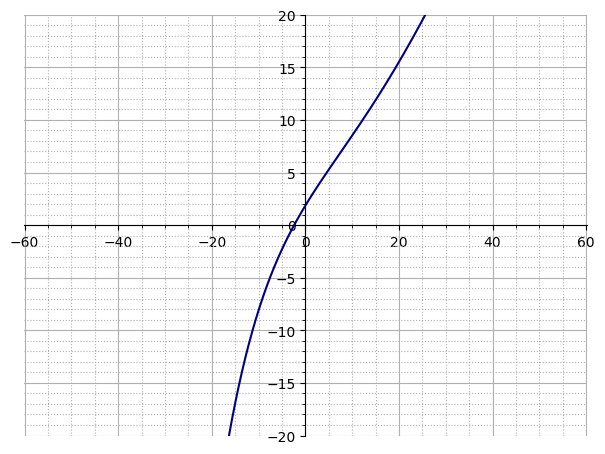

In [124]:
a=-60
b=60

h=0.1  

plt.ylim([-20, 20])
plt.xlim([a-h, b+h])

# включаем основную сетку
plt.grid(which='major')
plt.minorticks_on()
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

s_list= np.arange(a, b+h, h)
r_list=[result.evalf(subs={lmb:s_init}) for s_init in s_list]
        
plt.plot(s_list, r_list, color='#000080')
       

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show();

Строим собственные функции соответствующие собственныс числам

$sob[0],\quad sob[2],\quad sob[4].$

In [128]:
Psi1=lambda x : psi(x).evalf(subs={lmb:sob[0]})
Psi2=lambda x : psi(x).evalf(subs={lmb:sob[1]})
Psi3=lambda x : psi(x).evalf(subs={lmb:sob[2]})



In [ ]:
x_list= np.arange(0., 1.01, 0.01)
y1_list=[Psi1(x).evalf(subs={x:x_init}) for x_init in x_list]
y2_list=[Psi2(x).evalf(subs={x:x_init}) for x_init in x_list]
y3_list=[Psi3(x).evalf(subs={x:x_init}) for x_init in x_list]
#y4_list=[Psi4(x).evalf(subs={x:x_init}) for x_init in x_list]

# точные собственные функции
cos1=[np.cos((np.pi/2+np.pi*0)*x_init) for x_init in x_list]
cos2=[np.cos((np.pi/2+np.pi*1)*x_init) for x_init in x_list]
cos3=[np.cos((np.pi/2+np.pi*2)*x_init) for x_init in x_list]
#cos4=[np.cos((np.pi/2+np.pi*2)*x_init) for x_init in x_list]



plt.plot(x_list,y1_list)
plt.plot(x_list,cos1)

plt.plot(x_list,y2_list)
plt.plot(x_list,cos2)

plt.plot(x_list,y3_list)
plt.plot(x_list,cos3)

#plt.plot(x_list,y4_list)
#plt.plot(x_list,cos4);